# Enem x Educação Básica
### Um estudo feito baseado nos microdados do INEP, com o objetivo de entender o quanto a infraestrutura de uma escola primária interfere no resultado do ENEM ao seu redor.

### Importações Iniciais, instale via pip install -r requirements.txt

In [34]:
import pandas as pd
import qgrid
import pyodbc

In [35]:
for driver in pyodbc.drivers():
    print(driver)

SQL Server
Oracle em OraDB19Home1
Oracle em OraDB18Home1
Oracle em OraDB12Home1
Oracle em OraDB12Home2
Oracle em OraDB12Home3
SQL Server Native Client 11.0
SQL Server Native Client RDA 11.0
ODBC Driver 13 for SQL Server
ODBC Driver 17 for SQL Server
MySQL ODBC 5.1 Driver


In [36]:
server = 'DESKTOP-EUUPVRR'
database = 'BASE_ENEM'
username = 'Analise'
password = 'Analise123'
#cnxn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password + ';MARS_Connection = yes')
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password + ';MARS_Connection = yes')

print('Funfou')

Funfou


In [37]:
sql ='''SELECT *,CAST(FK_COD_MUNICIPIO AS VARCHAR) FK_COD_MUNICIPIO_MOD FROM 
(select 
B.CO_ESCOLA_EDUCACENSO,

AVG(CAST(A.NU_NOTA_CN AS NUMERIC(15,2))) NU_NOTA_CN,
AVG(CAST(A.NU_NOTA_CH AS NUMERIC(15,2)))NU_NOTA_CH,
AVG(CAST(A.NU_NOTA_LC AS NUMERIC(15,2)))NU_NOTA_LC,
AVG(CAST(A.NU_NOTA_MT AS NUMERIC(15,2)))NU_NOTA_MT,
AVG(CAST(A.NU_NOTA_REDACAO AS NUMERIC(15,2)))NU_NOTA_REDACAO

 from [BASE_ENEM].[dbo].[Micro_dados_enem_2015] A
left join
[BASE_ENEM].[dbo].[Micro_dados_enem_escola] B
ON
A.co_escola = B.CO_ESCOLA_EDUCACENSO
GROUP BY 
B.CO_ESCOLA_EDUCACENSO)A 
JOIN
[BASE_ENEM].[dbo].[ESCOLA] B 
ON
A.CO_ESCOLA_EDUCACENSO = B.pk_cod_entidade'''
data = pd.read_sql(sql,cnxn)
print('Foi')

Foi


In [38]:
pd_dados = pd.DataFrame(data)
pd_dados

,CO_ESCOLA_EDUCACENSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO_CENSO,PK_COD_ENTIDADE,NO_ENTIDADE,COD_ORGAO_REGIONAL_INEP,...,ID_MATERIAL_ESP_QUILOMBOLA,ID_MATERIAL_ESP_INDIGENA,ID_EDUCACAO_INDIGENA,ID_LINGUA_INDIGENA,FK_COD_LINGUA_INDIGENA,ID_LINGUA_PORTUGUESA,ID_ESPACO_TURMA_PBA,ID_ABRE_FINAL_SEMANA,ID_PROPOSTA_PEDAG_ALTERNANCIA,FK_COD_MUNICIPIO_MOD
0,17033705,432.330434,520.669565,455.200000,400.356521,421.538461,2014,17033705,COL EST CEL JOSE FRANCISCO DE AZEVEDO,00004,...,0,0,0,None,None,None,0,1,0,1705607
1,21272220,493.100000,585.100000,537.700000,464.300000,540.000000,2014,21272220,CE ISAAC MARTINS ANEXO I - IPU-IRU,00014,...,0,0,0,None,None,None,0,0,0,2112308
2,12002046,433.243750,521.875000,455.481250,420.521875,425.454545,2014,12002046,ESC FRANCISCO FREIRE DE CARVALHO,None,...,0,0,0,None,None,None,0,0,0,1200336
3,12017540,427.343037,507.635443,454.889610,403.415584,399.139784,2014,12017540,ESC DIVINA PROVIDENCIA,None,...,0,0,0,None,None,None,0,0,0,1200708
4,17046807,593.648780,644.782926,586.482926,622.197560,664.186046,2014,17046807,COLEGIO MARISTA PALMAS,00000,...,0,0,0,None,None,None,0,0,0,1721000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,35024855,474.682608,532.442028,503.985507,459.711594,424.337349,2014,35024855,GASTAO LIBERAL PINTO DOM,20511,...,0,0,0,None,None,None,0,0,0,3507407
24561,35001636,545.626108,631.821182,589.424137,581.142857,609.952153,2014,35001636,CAMARGO ARANHA PROF ETEC,11000,...,0,0,0,None,None,None,0,0,0,3550308
24562,35014011,463.505555,524.675000,480.294117,441.447058,237.469696,2014,35014011,ROQUE DE CASTRO REIS PROFESSOR,20206,...,0,0,0,None,None,None,0,1,0,3554102
24563,35045494,458.818181,550.290909,493.863636,444.372727,343.529411,2014,35045494,FLAIR CARLOS DE OLIVEIRA ARMANY DOUTOR,20206,...,0,0,0,None,None,None,0,0,0,3508504


In [39]:
estados=pd.read_csv(r'BASES\DADOS\estados.CSV',delimiter=";")

In [40]:
pd_estado = pd.DataFrame(estados,columns=['COD_REGIAO','CIDADE','ESTADO'])
pd_estado.columns = ['FK_COD_MUNICIPIO_MOD','CIDADE','ESTADO']
pd_estado['FK_COD_MUNICIPIO_MOD'] = pd_estado['FK_COD_MUNICIPIO_MOD'].astype(int)
pd_estado.dtypes
pd_estado

,FK_COD_MUNICIPIO_MOD,CIDADE,ESTADO
0,1100015,ALTA FLORESTA D´OESTE,RO
1,1100023,ARIQUEMES,RO
2,1100031,CABIXI,RO
3,1100049,CACOAL,RO
4,1100056,CEREJEIRAS,RO
...,...,...,...
5565,5222005,VIANOPOLIS,GO
5566,5222054,VICENTINOPOLIS,GO
5567,5222203,VILA BOA,GO
5568,5222302,VILA PROPICIO,GO


In [41]:
pd_dados['FK_COD_MUNICIPIO_MOD'] = pd_dados['FK_COD_MUNICIPIO_MOD'].astype(int)
pd_dados.dtypes
pd_dados

,CO_ESCOLA_EDUCACENSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO_CENSO,PK_COD_ENTIDADE,NO_ENTIDADE,COD_ORGAO_REGIONAL_INEP,...,ID_MATERIAL_ESP_QUILOMBOLA,ID_MATERIAL_ESP_INDIGENA,ID_EDUCACAO_INDIGENA,ID_LINGUA_INDIGENA,FK_COD_LINGUA_INDIGENA,ID_LINGUA_PORTUGUESA,ID_ESPACO_TURMA_PBA,ID_ABRE_FINAL_SEMANA,ID_PROPOSTA_PEDAG_ALTERNANCIA,FK_COD_MUNICIPIO_MOD
0,17033705,432.330434,520.669565,455.200000,400.356521,421.538461,2014,17033705,COL EST CEL JOSE FRANCISCO DE AZEVEDO,00004,...,0,0,0,None,None,None,0,1,0,1705607
1,21272220,493.100000,585.100000,537.700000,464.300000,540.000000,2014,21272220,CE ISAAC MARTINS ANEXO I - IPU-IRU,00014,...,0,0,0,None,None,None,0,0,0,2112308
2,12002046,433.243750,521.875000,455.481250,420.521875,425.454545,2014,12002046,ESC FRANCISCO FREIRE DE CARVALHO,None,...,0,0,0,None,None,None,0,0,0,1200336
3,12017540,427.343037,507.635443,454.889610,403.415584,399.139784,2014,12017540,ESC DIVINA PROVIDENCIA,None,...,0,0,0,None,None,None,0,0,0,1200708
4,17046807,593.648780,644.782926,586.482926,622.197560,664.186046,2014,17046807,COLEGIO MARISTA PALMAS,00000,...,0,0,0,None,None,None,0,0,0,1721000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,35024855,474.682608,532.442028,503.985507,459.711594,424.337349,2014,35024855,GASTAO LIBERAL PINTO DOM,20511,...,0,0,0,None,None,None,0,0,0,3507407
24561,35001636,545.626108,631.821182,589.424137,581.142857,609.952153,2014,35001636,CAMARGO ARANHA PROF ETEC,11000,...,0,0,0,None,None,None,0,0,0,3550308
24562,35014011,463.505555,524.675000,480.294117,441.447058,237.469696,2014,35014011,ROQUE DE CASTRO REIS PROFESSOR,20206,...,0,0,0,None,None,None,0,1,0,3554102
24563,35045494,458.818181,550.290909,493.863636,444.372727,343.529411,2014,35045494,FLAIR CARLOS DE OLIVEIRA ARMANY DOUTOR,20206,...,0,0,0,None,None,None,0,0,0,3508504


In [42]:
base_fonte = pd.merge(pd_estado,pd_dados, how='inner',on ='FK_COD_MUNICIPIO_MOD')
base_fonte

,FK_COD_MUNICIPIO_MOD,CIDADE,ESTADO,CO_ESCOLA_EDUCACENSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO_CENSO,...,ID_MATERIAL_ESP_NAO_UTILIZA,ID_MATERIAL_ESP_QUILOMBOLA,ID_MATERIAL_ESP_INDIGENA,ID_EDUCACAO_INDIGENA,ID_LINGUA_INDIGENA,FK_COD_LINGUA_INDIGENA,ID_LINGUA_PORTUGUESA,ID_ESPACO_TURMA_PBA,ID_ABRE_FINAL_SEMANA,ID_PROPOSTA_PEDAG_ALTERNANCIA
0,1100015,ALTA FLORESTA D´OESTE,RO,11025638,452.234579,522.276635,452.691346,432.531730,407.692307,2014,...,1,0,0,0,None,None,None,0,0,0
1,1100015,ALTA FLORESTA D´OESTE,RO,11024968,457.415686,542.131372,483.994000,439.420000,474.339622,2014,...,1,0,0,0,None,None,None,0,0,0
2,1100023,ARIQUEMES,RO,11007893,458.950230,535.082027,467.966037,435.116509,405.600000,2014,...,1,0,0,0,None,None,None,0,0,0
3,1100023,ARIQUEMES,RO,11006889,443.055737,519.226229,466.755172,426.132758,324.266666,2014,...,1,0,0,0,None,None,None,0,0,0
4,1100023,ARIQUEMES,RO,11048620,449.900000,519.288888,436.883333,411.572222,285.384615,2014,...,1,0,0,0,None,None,None,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,5300108,BRASILIA,DF,53051009,471.010576,552.984615,508.908737,438.506796,401.044776,2014,...,1,0,0,0,None,None,None,0,0,0
24561,5300108,BRASILIA,DF,53015444,522.416666,583.566666,521.991666,527.133333,580.000000,2014,...,1,0,0,0,None,None,None,0,0,0
24562,5300108,BRASILIA,DF,53006739,470.188178,550.259744,502.336858,454.938782,485.655976,2014,...,1,0,0,0,None,None,None,0,0,0
24563,5300108,BRASILIA,DF,53001281,543.358536,621.731707,567.907500,610.297500,651.951219,2014,...,1,0,0,0,None,None,None,0,0,0


In [43]:
municipios=pd.read_csv(r'BASES\DADOS\municipios.CSV',delimiter=",")
municipios.columns = ['FK_COD_MUNICIPIO_MOD','NOME','LATITUDE','LONGITUDE','CAPITAL','COD_UF']
municipios['FK_COD_MUNICIPIO_MOD'] = municipios['FK_COD_MUNICIPIO_MOD'].astype(int)
municipios

,FK_COD_MUNICIPIO_MOD,NOME,LATITUDE,LONGITUDE,CAPITAL,COD_UF
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


In [44]:
base_juncao = pd.merge(municipios,base_fonte, how='inner',on ='FK_COD_MUNICIPIO_MOD')

In [45]:
base_juncao

,FK_COD_MUNICIPIO_MOD,NOME,LATITUDE,LONGITUDE,CAPITAL,COD_UF,CIDADE,ESTADO,CO_ESCOLA_EDUCACENSO,NU_NOTA_CN,...,ID_MATERIAL_ESP_NAO_UTILIZA,ID_MATERIAL_ESP_QUILOMBOLA,ID_MATERIAL_ESP_INDIGENA,ID_EDUCACAO_INDIGENA,ID_LINGUA_INDIGENA,FK_COD_LINGUA_INDIGENA,ID_LINGUA_PORTUGUESA,ID_ESPACO_TURMA_PBA,ID_ABRE_FINAL_SEMANA,ID_PROPOSTA_PEDAG_ALTERNANCIA
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,ABADIA DE GOIAS,GO,52040127,461.657142,...,1,0,0,0,None,None,None,0,0,0
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,ABADIA DO DOURADOS,MG,31200271,470.477777,...,1,0,0,0,None,None,None,0,0,0
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,ABADIANIA,GO,52043509,498.233333,...,1,0,0,0,None,None,None,0,1,0
3,5200100,Abadiânia,-16.19700,-48.7057,0,52,ABADIANIA,GO,52043223,442.746835,...,1,0,0,0,None,None,None,0,0,0
4,3100203,Abaeté,-19.15510,-45.4444,0,31,ABAETE,MG,31031836,479.243200,...,1,0,0,0,None,None,None,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,2114007,Zé Doca,-3.27014,-45.6553,0,21,ZE DOCA,MA,21088128,NaN,...,None,None,None,None,None,None,None,None,None,None
24561,2114007,Zé Doca,-3.27014,-45.6553,0,21,ZE DOCA,MA,21435219,513.738709,...,1,0,0,0,None,None,None,0,0,0
24562,2114007,Zé Doca,-3.27014,-45.6553,0,21,ZE DOCA,MA,21088144,435.249549,...,1,0,0,0,None,None,None,0,1,0
24563,2114007,Zé Doca,-3.27014,-45.6553,0,21,ZE DOCA,MA,21088110,426.217460,...,1,0,0,0,None,None,None,0,1,0


In [46]:
import folium
from folium.plugins import MarkerCluster

In [47]:
from folium.plugins import FastMarkerCluster
#MarkerCluster(locations=base_juncao[['LATITUDE','LONGITUDE']]).add_to(mapa)
mapa = folium.Map(location=[-14.356625,-50.343006],zoom_start=5)
FastMarkerCluster(data=base_juncao[['LATITUDE','LONGITUDE']]).add_to(mapa)

In [48]:
mapa

In [49]:
import pandas as pd
import qgrid
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from datetime import datetime
import folium
from folium import plugins
from folium.plugins import HeatMap

%matplotlib inline

In [50]:
df = pd.read_excel('tabelafonte.xlsx', sheet_name="Planilha1")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24565 entries, 0 to 24564
Columns: 144 entries, CO_ESCOLA_EDUCACENSO to ID_PROPOSTA_PEDAG_ALTERNANCIA
dtypes: float64(75), int64(65), object(4)
memory usage: 27.0+ MB


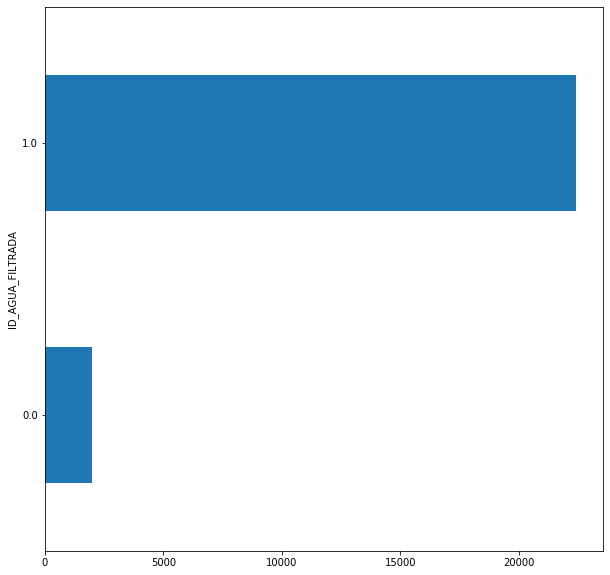

In [52]:
df.groupby('ID_AGUA_FILTRADA').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

### Comparando a média de notas em escolas com agua filtrada vs sem agua filtrada

In [53]:
print('Nota média de Ciências da Natureza em escolas com agua filtrada: ' + str(df.query('ID_AGUA_FILTRADA == 1')['NU_NOTA_CN'].mean()))
print('Nota média de Ciências da Natureza em escolas sem agua filtrada: ' + str(df.query('ID_AGUA_FILTRADA == 0')['NU_NOTA_CN'].mean()))
print('Nota média da Redação em escolas com agua filtrada: ' + str(df.query('ID_AGUA_FILTRADA == 1')['NU_NOTA_REDACAO'].mean()))
print('Nota média da Redação em escolas com agua filtrada: ' + str(df.query('ID_AGUA_FILTRADA == 0')['NU_NOTA_REDACAO'].mean()))

Nota média de Ciências da Natureza em escolas com agua filtrada: 478.69761400687577
Nota média de Ciências da Natureza em escolas sem agua filtrada: 462.9757984886644
Nota média da Redação em escolas com agua filtrada: 477.4336190518667
Nota média da Redação em escolas com agua filtrada: 440.35621621621635


### Função usada para preencher o rotulo dos dads em gráficos

In [54]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')

### Comparando as notas considerando a existência de agua filtrada

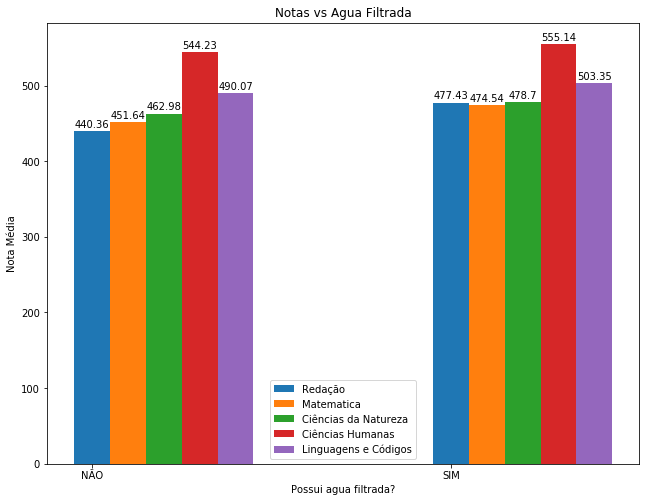

In [55]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_AGUA_FILTRADA')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui agua filtrada?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Agua Filtrada')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

### Comparando as notas considerando Laboratório de Informática

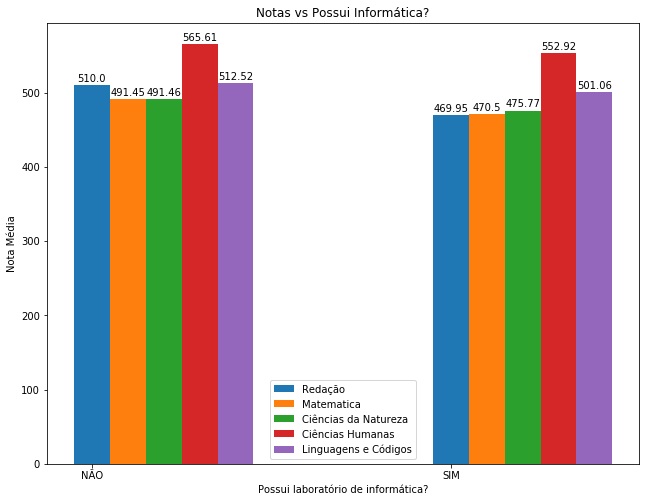

In [56]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_LABORATORIO_INFORMATICA')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui laboratório de informática?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Possui Informática?')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

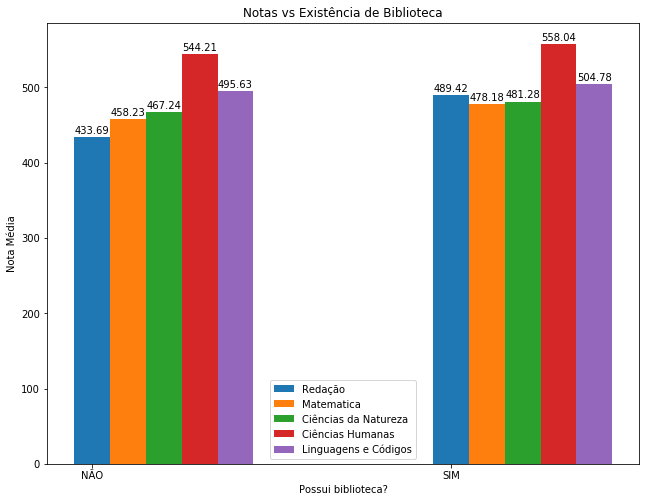

In [57]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_BIBLIOTECA')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui biblioteca?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Existência de Biblioteca')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

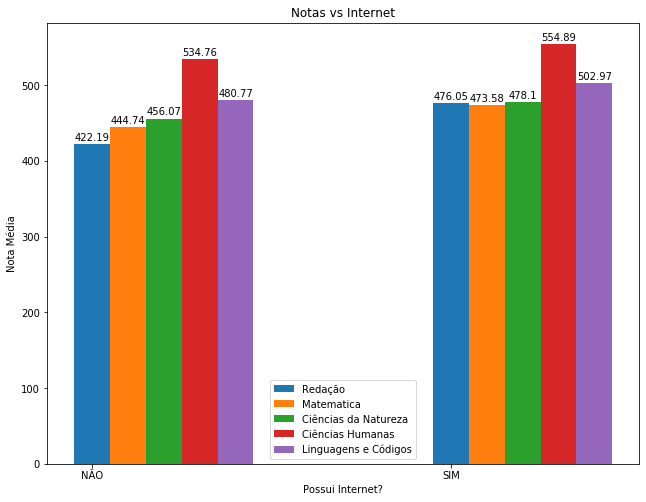

In [58]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_INTERNET')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_INTERNET')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_INTERNET')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_INTERNET')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_INTERNET')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Possui Internet?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Internet')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

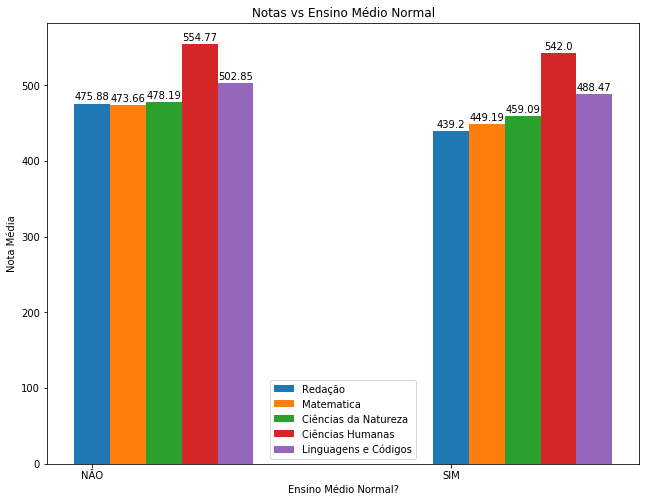

In [59]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_REG_MEDIO_NORMAL')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Ensino Médio Normal?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Ensino Médio Normal')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

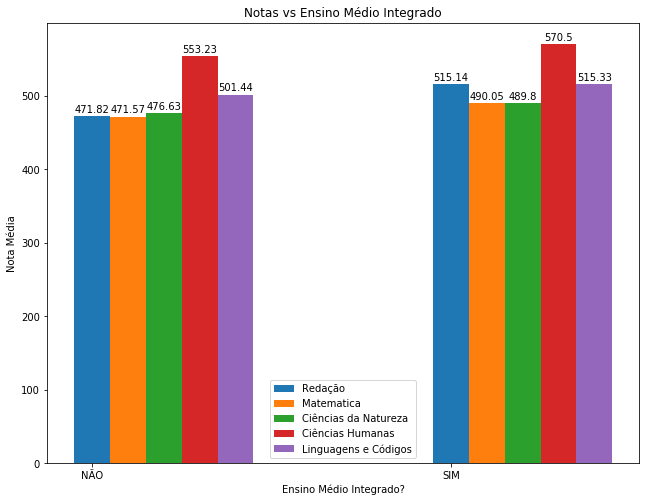

In [60]:
#Obter a medida agregada por categoria
redacao_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_REDACAO'].mean().round(2)
mat_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_MT'].mean().round(2)
cnatureza_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_CN'].mean().round(2)
chumanas_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_CH'].mean().round(2)
linguagens_ag = df.groupby('ID_REG_MEDIO_INTEGRADO')['NU_NOTA_LC'].mean().round(2)

#Defino o intervalo
x=np.arange(len([1,2]))
#Defino a largura das barras
width=0.1

# Instancio e configuro o esqueleto do gráfico de barras
fig, ax = plt.subplots()
ax.set_ylabel('Nota Média')
ax.set_xlabel('Ensino Médio Integrado?')
ax.set_xticks(x)
ax.set_xticklabels(['NÃO', 'SIM'])
ax.set_title('Notas vs Ensino Médio Integrado')

# Preencho com os dados, gerando uma barra para cada nota
rects1 = ax.bar(x+0*width, redacao_ag, width, label='Redação')
rects2 = ax.bar(x+1*width, mat_ag, width, label='Matematica')
rects3 = ax.bar(x+2*width, cnatureza_ag, width, label='Ciências da Natureza')
rects4 = ax.bar(x+3*width, chumanas_ag, width, label='Ciências Humanas')
rects5 = ax.bar(x+4*width, linguagens_ag, width, label='Linguagens e Códigos')

ax.legend() #so a legenda que não aparece

# Insiro os rotulos dos dados através da função autolabel
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Mudo o layout de exibição e ploto o gráfico
fig.tight_layout(pad=-10)
plt.show()

### Relação entre Redação e Nota Lingua Portuguesa

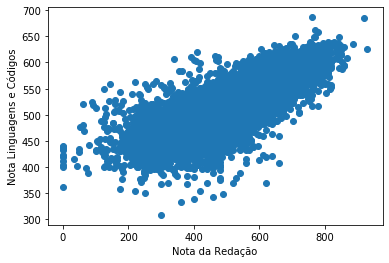

In [61]:
plt.scatter(df['NU_NOTA_REDACAO'],df['NU_NOTA_LC'])
plt.xlabel('Nota da Redação')
plt.ylabel('Nota Linguagens e Códigos')
plt.show()

### Escolas que zeraram na redação 

In [62]:
print('Ao todo foram %i escolas que na média zeraram no enem'% df.query('NU_NOTA_REDACAO == 0')['CO_ESCOLA_EDUCACENSO'].nunique())
print('Nota média em Matematíca e suas tecnologias: %a'% df.query('NU_NOTA_REDACAO == 0')['NU_NOTA_MT'].mean())
print('Nota média em Ciências da Natureza e suas tecnologias: %a '% df.query('NU_NOTA_REDACAO == 0')['NU_NOTA_CN'].mean())
print('Nota média em Ciencias Humanas e suas tecnologias: %a'% df.query('NU_NOTA_REDACAO == 0')['NU_NOTA_CH'].mean())
print('Nota média em Linguagens e códigos e suas tecnologias: %a'% df.query('NU_NOTA_REDACAO == 0')['NU_NOTA_LC'].mean())

Ao todo foram 73 escolas que na média zeraram no enem
Nota média em Matematíca e suas tecnologias: 383.59
Nota média em Ciências da Natureza e suas tecnologias: 407.7846153846154 
Nota média em Ciencias Humanas e suas tecnologias: 467.5038461538461
Nota média em Linguagens e códigos e suas tecnologias: 416.28000000000003


### Quantidade de Salas Subtulizadas

In [63]:
print('O saldo de Salas Existentes - Salas utilizadas é : %i ' % (df['NUM_SALAS_EXISTENTES'].sum() - df['NUM_SALAS_UTILIZADAS'].sum()))
print(r'Existem %i escolas que possuem salas vagas.' % df.query('NUM_SALAS_EXISTENTES > NUM_SALAS_UTILIZADAS')['CO_ESCOLA_EDUCACENSO'].count())
print(r'Existem %i escolas que possuem utilizam mais salas do que possuem.' % df.query('NUM_SALAS_EXISTENTES < NUM_SALAS_UTILIZADAS')['CO_ESCOLA_EDUCACENSO'].count())

O saldo de Salas Existentes - Salas utilizadas é : 15772 
Existem 5557 escolas que possuem salas vagas.
Existem 2358 escolas que possuem utilizam mais salas do que possuem.


# Trabalhos Futuros
## 1 - Plotar gráfico comparando média de notas por região
## 2 - Identificar áreas com menor resultado no ENEM e explorar sua infraestrutura
## 3 - Estudo de comportamento de uso da infraestrutura das escolas
## 4 -Clusterização dos dados e testes com ML